# Advent of Code 2025
## Day 9
### Part 1

In [34]:
import csv

def load_data(filename):
    with open(filename, 'r', newline='') as f:
        reader = csv.reader(f)
        return [tuple(reversed(tuple(map(int, row)))) for row in reader]

file_name = 'day9.txt'
coordinates = load_data(file_name)

In [35]:
import numpy as np
rect_sizes = np.zeros((len(coordinates), len(coordinates)))

for i in range(len(coordinates)):
    for j in range(len(coordinates)):
        side_a = abs(coordinates[j][0] - coordinates[i][0]) + 1
        side_b = abs(coordinates[j][1] - coordinates[i][1]) + 1
        rect_sizes[i,j] = side_a * side_b


In [36]:
np.max(rect_sizes)

np.float64(4715966250.0)

### Part 2

We create a polygon from the given coordinates. Then from largest rectangles to smallest. If a rectangle does not lie completely in a polygon we skip it.

In [37]:
row_indices, col_indices = np.tril_indices(rect_sizes.shape[0], k=-1)

# 3. Extract the actual values using these indices
lower_triangle_values = rect_sizes[row_indices, col_indices]
sort_indices_ascending = np.argsort(-lower_triangle_values)

sorted_values_desc = lower_triangle_values[sort_indices_ascending]
sorted_rows_desc = row_indices[sort_indices_ascending]
sorted_cols_desc = col_indices[sort_indices_ascending]

values_list = sorted_values_desc.tolist()

# List of indices (as tuples)
indices_list = list(zip(sorted_rows_desc, sorted_cols_desc))

In [38]:
from shapely.geometry import Polygon, box
poly = Polygon(coordinates)

i = 0
while True:
    x,y = indices_list[i]
    coord1 = coordinates[x]
    coord2 = coordinates[y]
    minx = min(coord1[0], coord2[0])
    maxx = max(coord1[0], coord2[0])
    miny = min(coord1[1], coord2[1])
    maxy = max(coord1[1], coord2[1])
    rect = box(minx, miny, maxx, maxy)

    if poly.covers(rect):
        print(values_list[i])
        break

    i += 1

1530527040.0


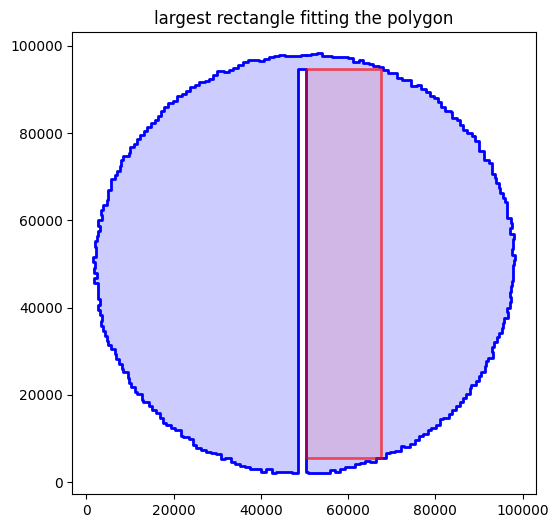

In [39]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.geometry import mapping

# Extract polygon coordinates
px, py = poly.exterior.xy

# Extract rectangle coordinates
rx, ry = rect.exterior.xy

plt.figure(figsize=(6,6))

# Draw polygon (blue)
plt.plot(px, py, linewidth=2, color='blue')
plt.fill(px, py, alpha=0.2, color='blue')

# Draw rectangle (red)
plt.plot(rx, ry, alpha = 0.6, linewidth=2, color='red')
plt.fill(rx, ry, alpha=0.1, color='red')

plt.gca().set_aspect('equal', 'box')
plt.title("largest rectangle fitting the polygon")
plt.show()